**IFSP - Campus Campinas** <br>
**Pós-graduação em Ciência de Dados** <br>
**Disciplina D3TOP – Tópicos em Ciência de Dados** <br>

Projeto em Grupo - Parte 2

v 2.0 - Entrada de PLO, pre-processamento e teste com endpoint do modelo

Professor: Samuel Martins (samuel.martins@ifsp.edu.br)<br>
Aluno: Swift Motoo Yaguchi - CP301665X

------

### Etapa de limpeza e pré-processamento

**Instalando bibliotecas**

In [1]:
#Upgrade dependencies
#!pip install --upgrade scikit-learn
#!pip install --upgrade wordcloud

In [1]:
import pandas as pd
import numpy as np

**Leitura do arquivo csv com as PLOs a serem testadas**

In [2]:
df = pd.read_csv('PLO 2019 v1.2.csv', sep=';')
df.head(3)

,Texto,Ementa,Vereador,Data,Nota,isUtil
0,Art. I Fica denominado Praça Sandra Hitomi Ta...,DENOMINA PRAÇA SANDRA HITOMI TAKAHASHI UM SIST...,Carmo Luiz,43500,9,não
1,Art. lº Ficam proibidos a comercialização e o...,PROÍBE O COMÉRCIO E O USO DOS PRODUTOS QUE ESP...,Luiz Rossini,43500,13,não
2,Art. 1 0 Poder Executivo municipal deverá disp...,DISPÕE SOBRE O ACESSO ÀS INFORMAÇÕES A RESPEIT...,Luiz Cirilo,43500,1,sim


### Processamento de texto: remoção de palavras irrelevantes e stemming

Remoção com bilioteca [nltk](https://www.nltk.org/)

In [3]:
#!pip install --upgrade nltk

In [4]:
# Install the library and functions
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Swift\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Swift\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import nltk, re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

# Get a list of stopwords from the NLTK library
stop = stopwords.words('portuguese')
# New stopword list
# Add 'Art' and 'Lei' to the stopwords list
sto = stop + ['art', 'lei']
# stopwords = [word for word in stop if word not in excluding]
stopwords = [word for word in sto]

In [6]:
print(stopwords)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [7]:
snow = SnowballStemmer('portuguese')

É preciso realizar outras tarefas de normalização nos dados. A seguinte função:

- Substitui todos os valores ausentes por uma string vazia
- Converte o texto em letras minúsculas
- Remove espaços em branco à esquerda ou à direita
- Remove espaços e recuos extras
- Remove marcações HTML

No loop  `for`, todas as palavras que __NOT__ são numéricas, têm mais de dois caracteres e não estão na lista de palavras irrelevantes são mantidas e retornadas.

In [8]:
import re
def process_text(texts):
    final_text_list=[]
    for sent in texts:

        # Check if the sentence is a missing value
        if isinstance(sent, str) == False:
            sent = ''
        filtered_sentence=[]
        sent = sent.lower() # Lowercase 
        sent = sent.strip() # Remove leading/trailing whitespace
        sent = re.sub('\s+', ' ', sent) # Remove extra space and tabs
        sent = re.compile('<.*?>').sub('', sent) # Remove HTML tags/markups:
        for w in word_tokenize(sent):
            # Applying some custom filtering here, feel free to try different things
            # Check if it is not numeric and its length>2 and not in stopwords
            if(not w.isnumeric()) and (len(w)>2) and (w not in stopwords) :
                # Stem and add to filtered list
                filtered_sentence.append(snow.stem(w))
        final_string = " ".join(filtered_sentence) # Final string of cleaned words
        final_text_list.append(final_string)
    return final_text_list

In [9]:
print('Processand a coluna Texto')
df['Texto'] = process_text(df['Texto'].tolist())
print('Processando a coluna Ementa')
df['Ementa'] = process_text(df['Ementa'].tolist())

Processand a coluna Texto
Processando a coluna Ementa


In [10]:
df.head(5)

,Texto,Ementa,Vereador,Data,Nota,isUtil
0,fic denomin prac sandr hitom takahash sistem r...,denomin prac sandr hitom takahash sistem recre...,Carmo Luiz,43500,9,não
1,fic proib comercializ uso espum serpentin prod...,proíb comérci uso produt especif acondicion sp...,Luiz Rossini,43500,13,não
2,pod execut municipal dev disponibiliz mei sit ...,dispõ sobr acess inform respeit obras públic m...,Luiz Cirilo,43500,1,sim
3,fic denomin prac iracem cost prac quart 7.508 ...,denomin prac iracem cost prac públic municípi ...,Carlão do PT,43500,9,não
4,fic alter 14.789 abril pass vigor seguint reda...,alter redaçã 14.789 abril dispõ sobr atend pri...,Paulo Galterio,43500,7,não


Com o conjunto de dados dividido, a função  `process_text` definida acima em cada um dos recursos de texto nos conjuntos de treinamento, teste e validação será executada

In [11]:
print('Processand a coluna Texto')
df['Texto'] = process_text(df['Texto'].tolist())

print('Processando a coluna Ementa')
df['Ementa'] = process_text(df['Ementa'].tolist())

Processand a coluna Texto
Processando a coluna Ementa


In [12]:
df.head(3)

,Texto,Ementa,Vereador,Data,Nota,isUtil
0,fic denomin prac sandr hitom takahash sist rec...,denomin prac sandr hitom takahash sist recr mu...,Carmo Luiz,43500,9,não
1,fic proib comercializ uso espum serpentin prod...,proíb comérc uso produt especif acondicion spr...,Luiz Rossini,43500,13,não
2,pod execut municipal dev disponibiliz mei sit ...,dispõ sobr acess inform respeit obras públic m...,Luiz Cirilo,43500,1,sim


#### Word Cloud

Text(0.5, 1.0, 'Word Cloud : PLO["Texto"]')

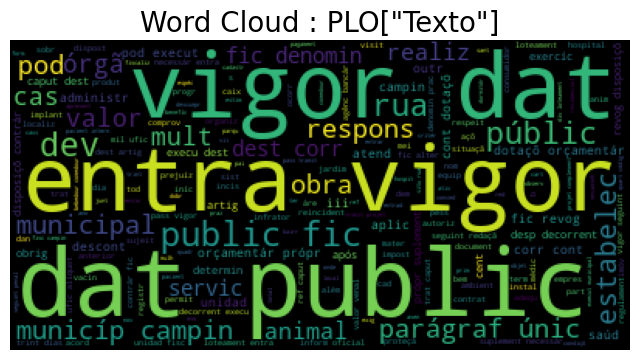

In [13]:
from wordcloud import WordCloud

# Generate a word cloud image
text = ' '.join(df['Texto'])
wordcloud = WordCloud().generate(text)

# Display the generated image the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud : PLO["Texto"]', fontsize=20)

Text(0.5, 1.0, 'Word Cloud : PLO["Ementa"]')

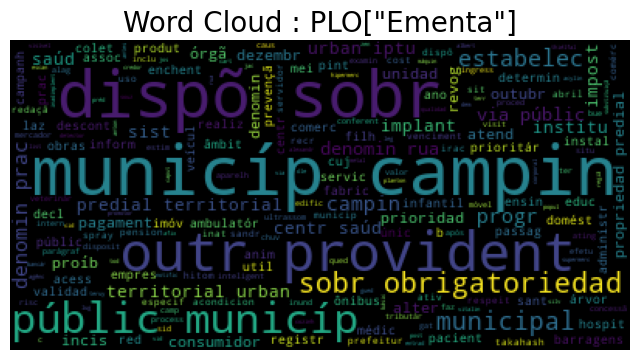

In [14]:
from wordcloud import WordCloud

# Generate a word cloud image
text = ' '.join(df['Ementa'])
wordcloud = WordCloud().generate(text)

# Display the generated image the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud : PLO["Ementa"]', fontsize=20)

### Processamento de dados com pipelines e um ColumnTransformer
Como temos dados numéricos e de texto, definimos os seguintes pipelines:
   * Para o pipeline de dados numéricos, o __numerical_processor__ usa um MinMaxScaler. 
   * Para o pipeline de dados de texto, o __text_processor__ usa  `CountVectorizer()` nos campos de texto.
As preparações seletivas dos recursos do conjunto de dados são reunidas em um ColumnTransformer coletivo, que será usado em um pipeline com um estimador. 

In [15]:
# Grab model features/inputs and target/output
numerical_features = ['Data', 'Nota']
text_features = ['Texto', 'Ementa']

model_features = numerical_features + text_features
model_target = 'isUtil'

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### COLUMN_TRANSFORMER ###
# Preprocess the numerical features
numerical_processor = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('num_scaler', MinMaxScaler()) 
                                ])
# Preprocess 1st text feature (larger vocabulary)
text_processor_0 = Pipeline([
    ('text_vect_0', CountVectorizer(binary=True, max_features=250))
                            ])

# Preprocess 2nd text feature 
text_precessor_1 = Pipeline([
    ('text_vect_1', CountVectorizer(binary=True, max_features=50))
                            ])

# Combine all data preprocessors from above 
# For each processor/step is specified a name, the actual process, and finally the features to be processed
data_preprocessor = ColumnTransformer([
    ('numerical_pre', numerical_processor, numerical_features),
    ('text_pre_0', text_processor_0, text_features[0]),
    ('text_pre_1', text_precessor_1, text_features[1])
                                      ]) 

### DATA PREPROCESSING ###
print('Datasets shapes before processing: ', df.shape)
X_df = data_preprocessor.fit_transform(df).toarray()
print('Datasets shapes after processing: ', X_df.shape)

Datasets shapes before processing:  (52, 6)
Datasets shapes after processing:  (52, 302)


Observa-se que o número de recursos nos conjuntos de dados passou de 4 para 302.

In [17]:
# salvando dados transformados
np.save('X_df_transformado.npy', X_df)

In [18]:
# recuperando dados transformados
X_df = np.load('X_df_transformado.npy', allow_pickle=True)

In [19]:
X_df.shape

(52, 302)

Vamos selecionar um dos PLOs de X_df

In [27]:
# selecionando índice do PLO dentre os dados de X_test
PLO_test = X_df[5]
print(PLO_test)

[0.         0.30769231 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         0.         0.
 1.         0.         0.         0.         0.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         1.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         1.
 0.         0.         0.         0.         0.         

### Preparação do dado de teste em JSON
É necessário converter os dados no format JSON para envio ao endpoint AWS

In [28]:
import json
import numpy as np
from scipy.sparse import csc_matrix

# Criar o array numpy
arr = PLO_test

# Converter o array numpy em uma matriz densa
#dense_arr = arr.toarray()

# Converter o array numpy em uma lista Python
lst = arr.tolist()

# Criar uma função de serialização personalizada para formatar os números com 1 casa decimal
def serialize_numbers(obj):
    if isinstance(obj, float):
        return '{:.1f}'.format(obj)
    else:
        return obj
    
# Criar um novo array numpy com os valores arredondados para 1 casa decimal
new_arr = np.round(arr).astype(int)

# Converter o novo array numpy em uma lista Python
new_lst = new_arr.tolist()

# Criar um dicionário com a chave "test_data" e a lista convertida em uma string
d = {"test_data": ", ".join(str(x) for x in new_lst)}

# Converter o dicionário em um texto JSON, usando a função de serialização personalizada
json_text = json.dumps(d, default=serialize_numbers)

# Imprimir o resultado
print(json_text)

{"test_data": "0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0"}


### Teste do endpoint
Agora que o endpoint está implementado, você enviará os dados de teste para ele e verá previsões dos dados.
Envio de dados para o endpoint do modelo através do AWS API Gateway e AWS Lambda

In [22]:
import requests
from bs4 import BeautifulSoup

In [29]:
# get the page
URL = ' https://xzie9m7gv8.execute-api.us-east-1.amazonaws.com/Test'

payload = json.loads(json_text)
r = requests.post(URL, json = payload)
print(r.text)

{"predictions": [{"score": 0.999666690826416, "predicted_label": 1}]}


Endpoint do modelo retonou "score" e "predcted_label", mostarndo que o envio remoto de dado de teste para processamento pelo AWS Sagemaker conforme modelo de ML guardado funcionou.



# Próximos passos para TCC:

- experimentar modelos de ML diferentes comparando as métricas
- testar os modelos com entrada de dados de PLO novas
- experimentar mudança de critério dos PLOs de “isUtil” para “Aproved”
- aumentar base de dados de PLOs
